In [ ]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('fetal_health.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<Axes: >

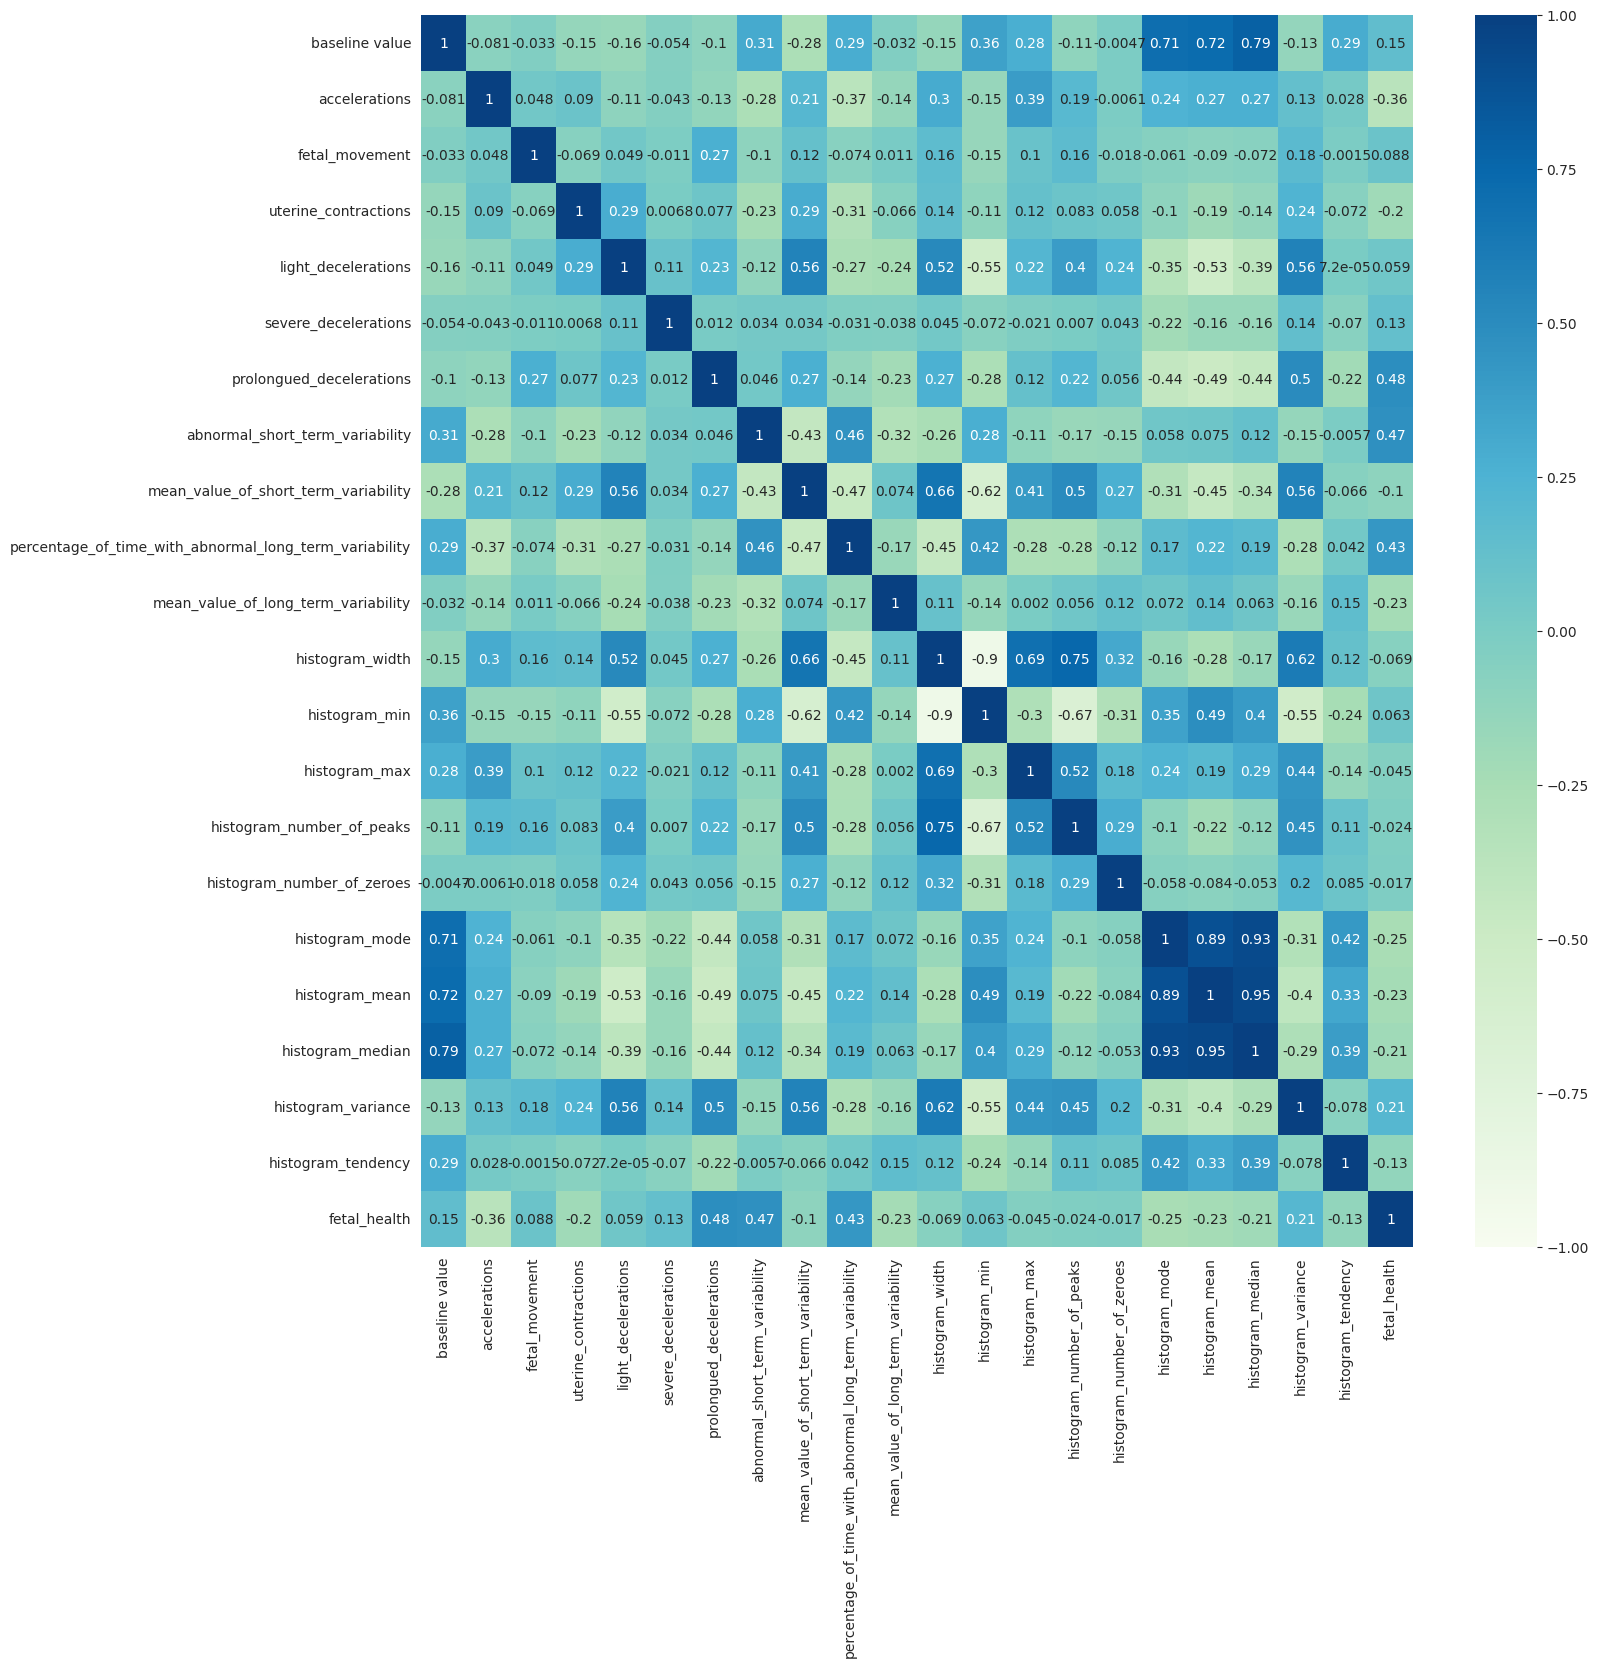

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot= True, cmap= "GnBu", vmin=-1, vmax=1)

en clasificacion no me interesa analizar mi variable a predecir contra mis variables predictoras

In [ ]:
df = df.drop(columns=["histogram_mode", "histogram_mean"], axis = 1)

<Axes: >

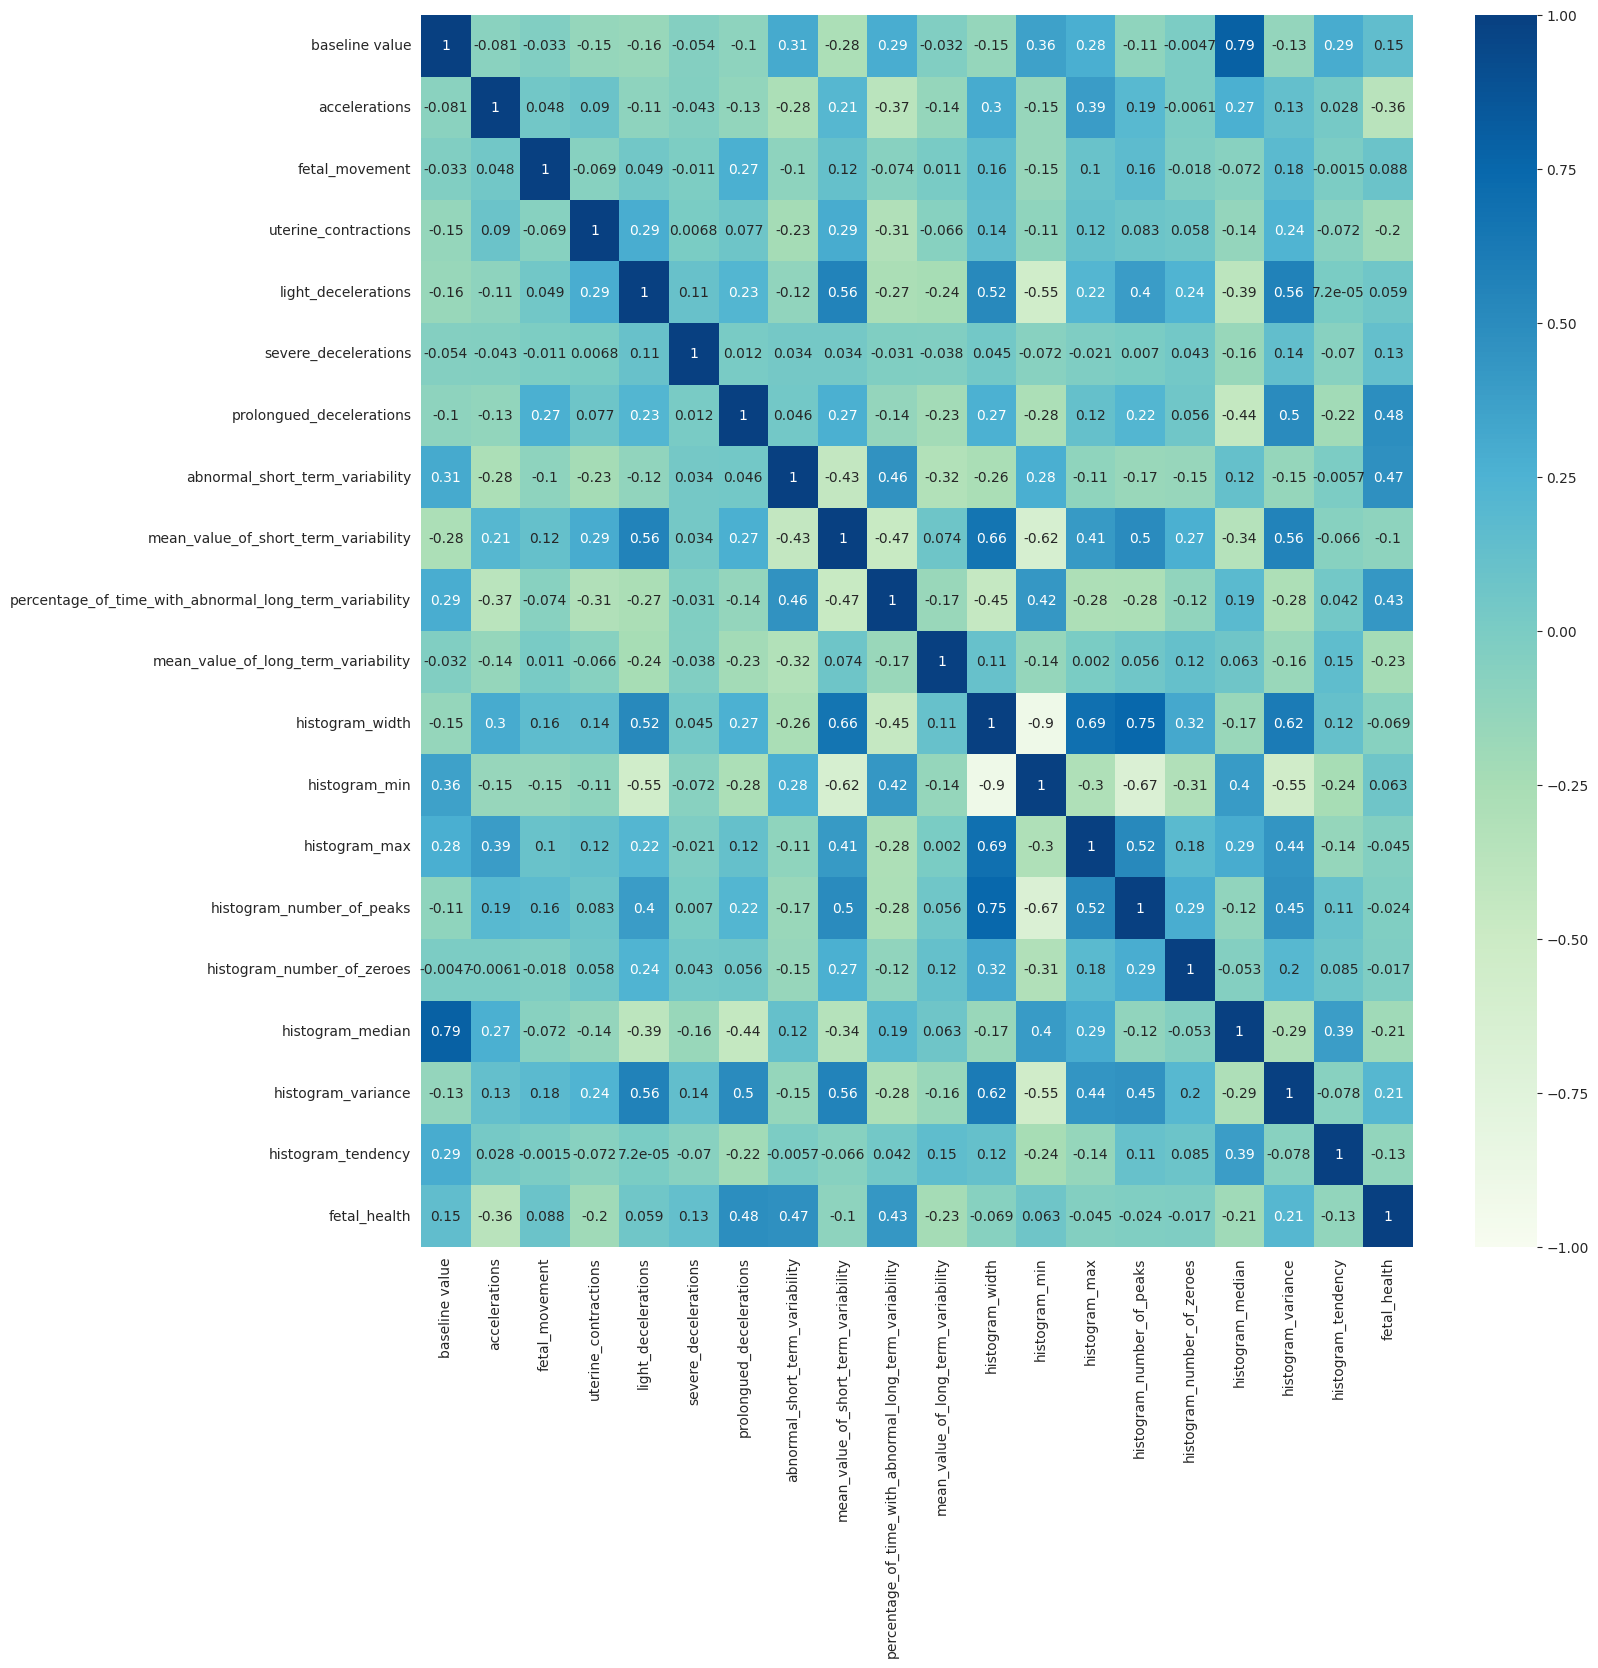

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot= True, cmap= "GnBu", vmin=-1, vmax=1)

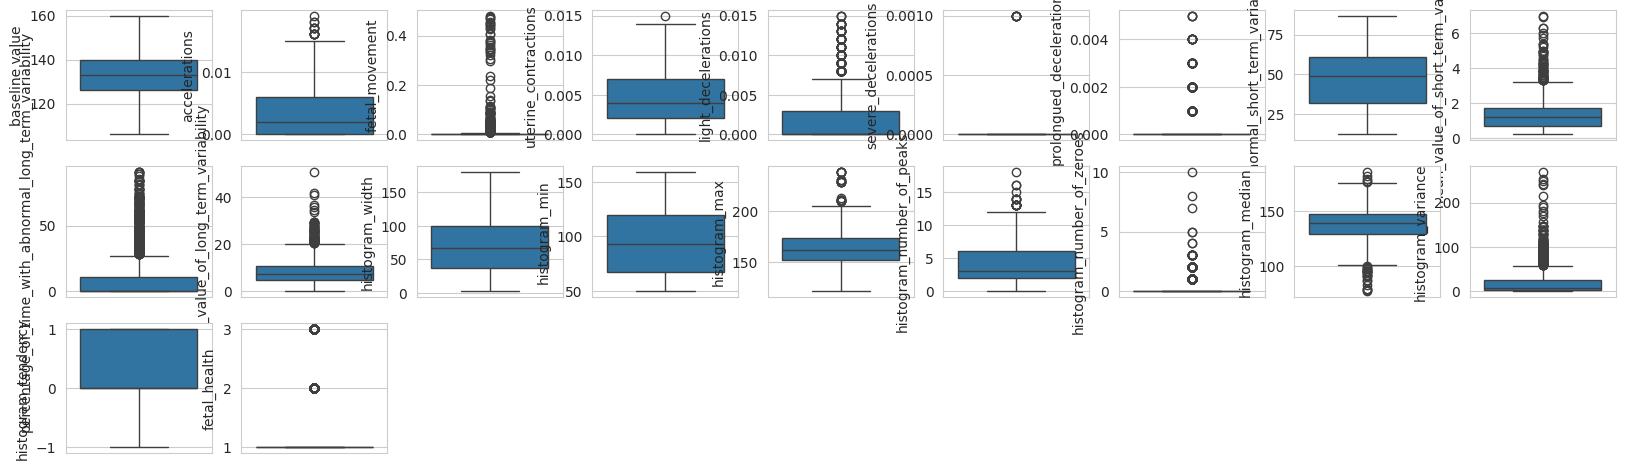

In [ ]:
plt.figure(figsize=(20,20))
c = df.columns
for i in range (len(c)):
  plt.subplot(10, 9, i+1)
  sns.boxplot(df[c[i]])

In [ ]:
for i in df.columns:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)

  df[i][df[i] <= q1] = q1
  df[i][df[i] >= q4] = q4

/tmp/ipython-input-2790223374.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][df[i] <= q1] = q1
/tmp/ipython-input-2790223374.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values 

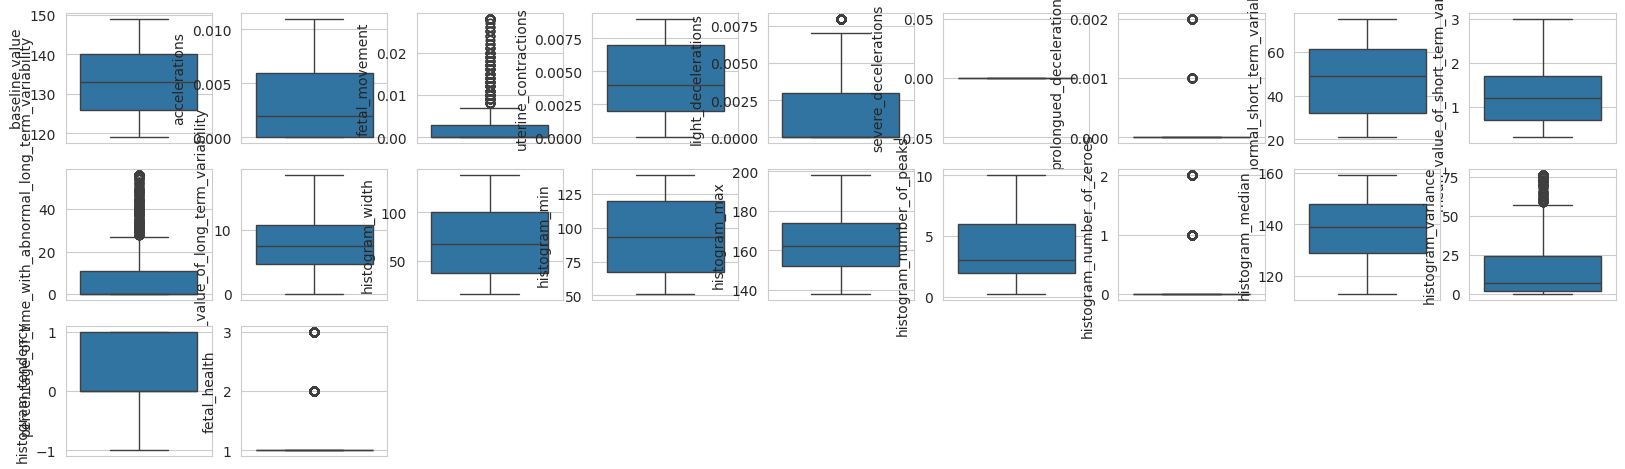

In [ ]:
plt.figure(figsize=(20,20))
c = df.columns
for i in range (len(c)):
  plt.subplot(10, 9, i+1)
  sns.boxplot(df[c[i]])

## Modelo

In [ ]:
X = df.drop(columns=["fetal_health"], axis=1)
y = df["fetal_health"]

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y.value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


In [ ]:
y_adj = y -1

In [ ]:
y_adj.value_counts()

,count
fetal_health,
0.0,1655
1.0,295
2.0,176


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_adj, test_size=0.2, random_state=42)

In [ ]:
ros = RandomOverSampler(random_state=42)
x_resampled_ros, y_resampled_ros = ros.fit_resample(x_train, y_train)

In [ ]:
y_resampled_ros.value_counts()

,count
fetal_health,
0.0,1322
1.0,1322
2.0,1322


In [ ]:
rus = RandomUnderSampler(random_state=42)
x_resampled_rus, y_resampled_rus = rus.fit_resample(x_train, y_train)

In [ ]:
y_resampled_rus.value_counts()

,count
fetal_health,
0.0,147
1.0,147
2.0,147


In [ ]:
smote = SMOTE(random_state=42)
x_resampled_smote, y_resampled_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_resampled_smote.value_counts()

,count
fetal_health,
0.0,1322
1.0,1322
2.0,1322


In [ ]:
def modeloANN (x_train, y_train, x_test, y_test):
  ann = Sequential()

  ann.add(Dense(18))

  ann.add(Dense(8, activation="relu"))

  ann.add(Dropout(0.2))

  ann.add(Dense(3,activation="softmax"))

  ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  ann.fit(x_train, y_train, epochs = 100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

  return ann

In [ ]:
ann_smote = modeloANN(x_resampled_smote, y_resampled_smote, x_test, y_test)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4084 - loss: 1.0937 - val_accuracy: 0.5305 - val_loss: 0.9497
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6635 - loss: 0.8204 - val_accuracy: 0.7394 - val_loss: 0.7070
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7266 - loss: 0.6417 - val_accuracy: 0.7911 - val_loss: 0.5699
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7413 - loss: 0.5645 - val_accuracy: 0.7934 - val_loss: 0.5333
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7579 - loss: 0.5347 - val_accuracy: 0.8005 - val_loss: 0.4997
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7679 - loss: 0.5147 - val_accuracy: 0.8075 - val_loss: 0.4813
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.4856 - val_accuracy: 0.8028 - val_loss: 0.4773
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4703 - val_accu

In [ ]:
ann_ros = modeloANN(x_resampled_ros, y_resampled_ros, x_test, y_test)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4778 - loss: 1.0958 - val_accuracy: 0.7746 - val_loss: 0.7662
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.7792 - val_accuracy: 0.7934 - val_loss: 0.5682
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.6480 - val_accuracy: 0.8005 - val_loss: 0.5314
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7509 - loss: 0.5813 - val_accuracy: 0.8146 - val_loss: 0.4499
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7630 - loss: 0.5435 - val_accuracy: 0.8052 - val_loss: 0.4674
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7988 - loss: 0.5169 - val_accuracy: 0.8099 - val_loss: 0.4410
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7985 - loss: 0.4993 - val_accuracy: 0.8216 - val_loss: 0.4051
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4718 - val_accu

In [ ]:
ann_rus = modeloANN(x_resampled_rus, y_resampled_rus, x_test, y_test)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2891 - loss: 1.1794 - val_accuracy: 0.5493 - val_loss: 1.0073
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3551 - loss: 1.0950 - val_accuracy: 0.6408 - val_loss: 0.9571
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5113 - loss: 1.0192 - val_accuracy: 0.6596 - val_loss: 0.9401
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5780 - loss: 0.9723 - val_accuracy: 0.6643 - val_loss: 0.9127
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6002 - loss: 0.9265 - val_accuracy: 0.7019 - val_loss: 0.8805
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6071 - loss: 0.8877 - val_accuracy: 0.7465 - val_loss: 0.8466
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6475 - loss: 0.8605 - val_accuracy: 0.7629 - val_loss: 0.8147
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6878 - loss: 0.8383 - val_accuracy: 0.7324 - 

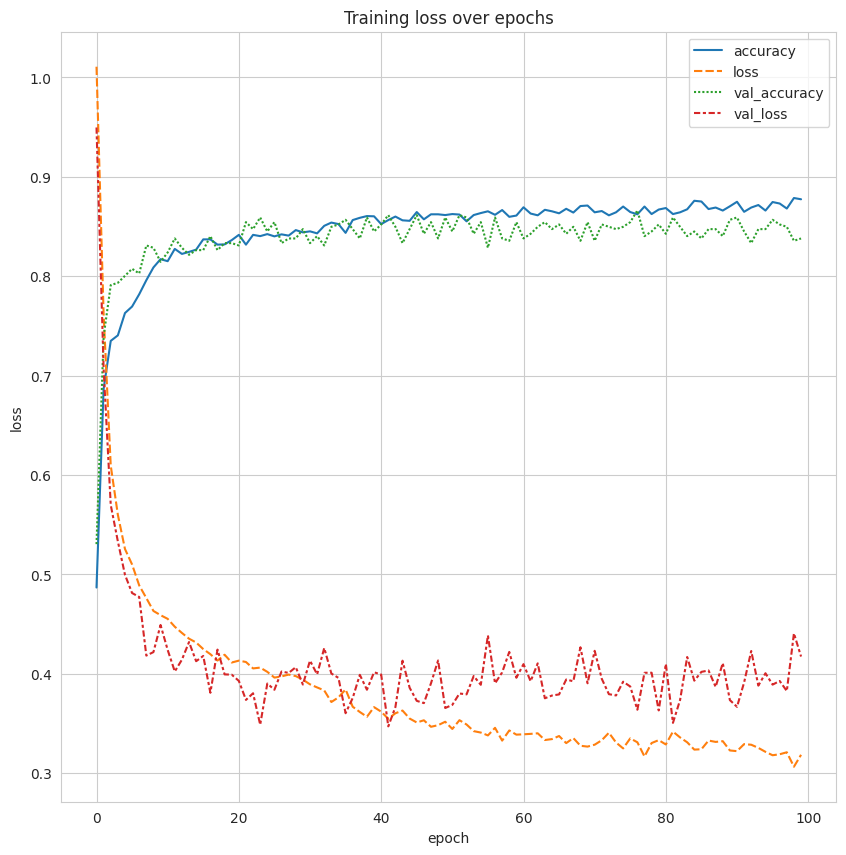

In [ ]:
loss = pd.DataFrame(ann_smote.history.history)
plt.figure(figsize=(10,10))
sns.lineplot(loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training loss over epochs")
plt.show()

In [ ]:
def reportar_Clasificacion(modelo, x_train, y_train, x_test, y_test):
# reporte de train
  y_pred_train = modelo.predict(x_train)

  if isinstance(modelo, Sequential):
    y_pred_train = np.argmax(y_pred_train, axis=1)

  print("--REPORTE DE TRAIN--")
  print(classification_report(y_train, y_pred_train))
# reporte de Test

  y_pred_test = modelo.predict(x_test)
  if isinstance(modelo, Sequential):
    y_pred_test = np.argmax(y_pred_test, axis=1)

  print("\n--REPORTE DE TEST--")
  print(classification_report(y_test, y_pred_test))

In [ ]:
reportar_Clasificacion(ann_smote, x_resampled_smote, y_resampled_smote, x_test, y_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--REPORTE DE TRAIN--
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1322
         1.0       0.82      0.92      0.86      1322
         2.0       0.93      0.90      0.91      1322

    accuracy                           0.90      3966
   macro avg       0.91      0.90      0.90      3966
weighted avg       0.91      0.90      0.90      3966

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--REPORTE DE TEST--
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91       333
         1.0       0.50      0.77      0.60        64
         2.0       0.64      0.86      0.74        29

    accuracy                           0.84       426
   macro avg       0.71      0.83      0.75       426
weighted avg       0.88      0.84      0.85       426



In [ ]:
reportar_Clasificacion(ann_rus, x_resampled_rus, y_resampled_rus, x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
--REPORTE DE TRAIN--
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       147
         1.0       0.79      0.87      0.83       147
         2.0       0.88      0.86      0.87       147

    accuracy                           0.87       441
   macro avg       0.87      0.87      0.87       441
weighted avg       0.87      0.87      0.87       441

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--REPORTE DE TEST--
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89       333
         1.0       0.47      0.80      0.59        64
         2.0       0.47      0.79      0.59        29

    accuracy                           0.80       426
   macro avg       0.64      0.80      0.69       426
weighted avg       0.88      0.80      0.82       426



In [ ]:
def modeloSVC(kernel, x_train, y_train):
  svc = SVC(kernel=kernel)
  svc.fit(x_train, y_train)
  return svc

In [ ]:
svc_model = modeloSVC("linear", x_resampled_smote, y_resampled_smote)

In [ ]:
reportar_Clasificacion(svc_model, x_resampled_smote, y_resampled_smote, x_test, y_test)

--REPORTE DE TRAIN--
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1322
         1.0       0.82      0.90      0.86      1322
         2.0       0.89      0.90      0.90      1322

    accuracy                           0.89      3966
   macro avg       0.90      0.89      0.89      3966
weighted avg       0.90      0.89      0.89      3966


--REPORTE DE TEST--
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       333
         1.0       0.52      0.77      0.62        64
         2.0       0.50      0.83      0.62        29

    accuracy                           0.83       426
   macro avg       0.67      0.81      0.72       426
weighted avg       0.88      0.83      0.85       426



In [ ]:
def graficar_matrix_confusion(modelo, x_data, y_data, class_names):
  y_pred = modelo.predict(x_data)

  cm = confusion_matrix(y_data, y_pred)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

  plt.title("Matriz de confusion", fontsize=16)
  plt.xlabel("Predicciones", fontsize=14)
  plt.ylabel("Valores reales", fontsize=14)
  plt.show()

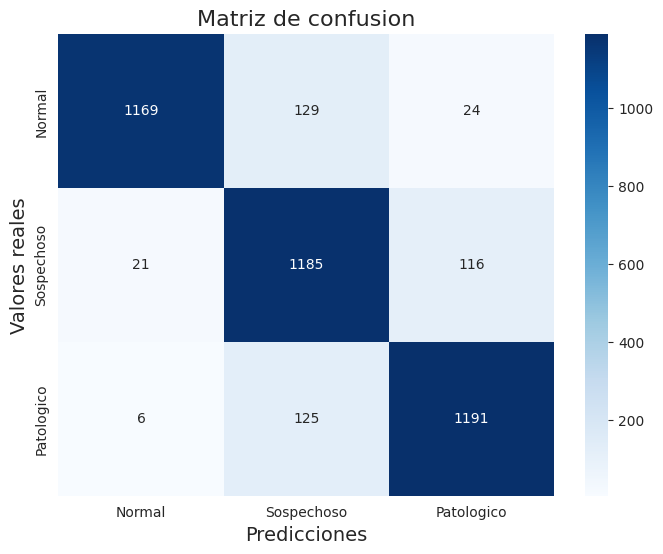

In [ ]:
class_names = ["Normal", "Sospechoso", "Patologico"]
graficar_matrix_confusion(svc_model, x_resampled_smote, y_resampled_smote, class_names)

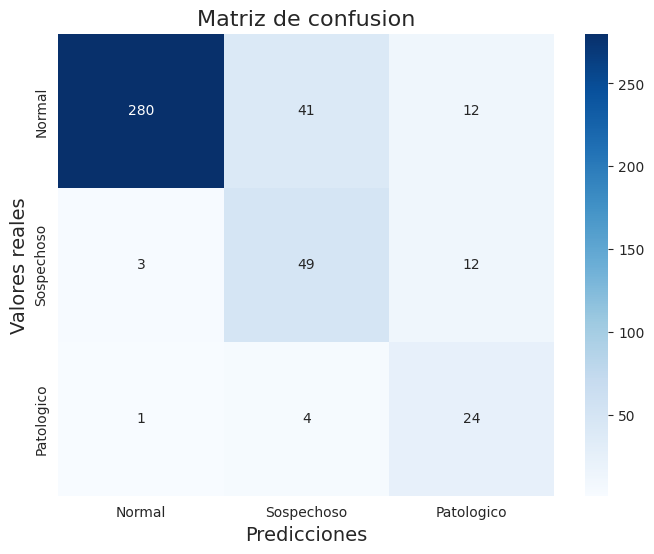

In [ ]:
graficar_matrix_confusion(svc_model, x_test, y_test, class_names)

In [ ]:
def xgboost_model(x_train, y_train):
  xgb_model = XGBClassifier(
      max_depth = 3,
      learning_rate = 0.05,
      n_estimators = 80,


      random_state = 42,
      objective = "multi:softmax",
      num_class = 3,
  )
  xgb_model.fit(x_train, y_train)
  return xgb_model

In [ ]:
xgb = xgboost_model(x_resampled_smote, y_resampled_smote)

In [ ]:
reportar_Clasificacion(xgb, x_resampled_smote, y_resampled_smote, x_test, y_test)


--REPORTE DE TRAIN--
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1322
         1.0       0.88      0.95      0.91      1322
         2.0       0.97      0.93      0.95      1322

    accuracy                           0.93      3966
   macro avg       0.94      0.93      0.93      3966
weighted avg       0.94      0.93      0.93      3966


--REPORTE DE TEST--
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       333
         1.0       0.62      0.81      0.70        64
         2.0       0.70      0.90      0.79        29

    accuracy                           0.89       426
   macro avg       0.77      0.87      0.81       426
weighted avg       0.91      0.89      0.90       426

